## Sell in May Seasonality Investment Strategy

In [3]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import yfinance as yf
from datetime import datetime
plt.style.use('fivethirtyeight')

In [5]:
# Get the data
df = yf.download(tickers=["SPY"], start='1993-01-29', end='2023-05-05')
# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.608616,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,24.783642,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,24.836155,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.098686,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.203722,531500
...,...,...,...,...,...,...
2023-04-28,411.489990,415.940002,411.429993,415.929993,407.424713,89335600
2023-05-01,415.470001,417.619995,415.269989,415.510010,407.013306,62122300
2023-05-02,414.769989,414.820007,407.820007,410.839996,402.438782,103998500


In [6]:
# Create a new column to store the Daily Simple Returns
df['DSR'] = df['Close'].pct_change(1)
# Show the new column
df['DSR']

Date
1993-01-29         NaN
1993-02-01    0.007112
1993-02-02    0.002119
1993-02-03    0.010571
1993-02-04    0.004184
                ...   
2023-04-28    0.008535
2023-05-01   -0.001010
2023-05-02   -0.011239
2023-05-03   -0.006864
2023-05-04   -0.007083
Name: DSR, Length: 7621, dtype: float64

In [7]:
# Get the Log Returns 
df['Log_Returns'] = np.log(1 + df['DSR']) # np.log(df['Close']).diff()
# Show the log returns
df['Log_Returns']

Date
1993-01-29         NaN
1993-02-01    0.007087
1993-02-02    0.002116
1993-02-03    0.010515
1993-02-04    0.004175
                ...   
2023-04-28    0.008499
2023-05-01   -0.001010
2023-05-02   -0.011303
2023-05-03   -0.006888
2023-05-04   -0.007108
Name: Log_Returns, Length: 7621, dtype: float64

In [11]:
# Get and store the month name and month number

# Create empty lists to store the values
MONTH_NAME = []
MONTH_NUM = []

# Create a loop to gather these values
for i in range(0, len(df)):
    df_date = str(df.index[i])
    df_month = df_date.split('-')[1]
    df_month_name = calendar.month_name[int(df_month)]

    # Appending the values to the list
    MONTH_NAME.append(df_month_name)
    MONTH_NUM.append(int(df_month))

In [12]:
# Store/ Add the lists to the dataframe as new columns
df['Month_Full_Name'] = MONTH_NAME
df['Month_Num'] = MONTH_NUM

In [13]:
# Show the data
df

,Open,High,Low,Close,Adj Close,Volume,DSR,Log_Returns,Month_Full_Name,Month_Num
Date,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.608616,1003200,NaN,NaN,January,1
1993-02-01,43.968750,44.250000,43.968750,44.250000,24.783642,480500,0.007112,0.007087,February,2
1993-02-02,44.218750,44.375000,44.125000,44.343750,24.836155,201300,0.002119,0.002116,February,2
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.098686,529400,0.010571,0.010515,February,2
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.203722,531500,0.004184,0.004175,February,2
...,...,...,...,...,...,...,...,...,...,...
2023-04-28,411.489990,415.940002,411.429993,415.929993,407.424713,89335600,0.008535,0.008499,April,4
2023-05-01,415.470001,417.619995,415.269989,415.510010,407.013306,62122300,-0.001010,-0.001010,May,5
2023-05-02,414.769989,414.820007,407.820007,410.839996,402.438782,103998500,-0.011239,-0.011303,May,5


In [14]:
# Group and store the mean log returns in a variable
series = df.groupby('Month_Num')['Log_Returns'].mean()*100

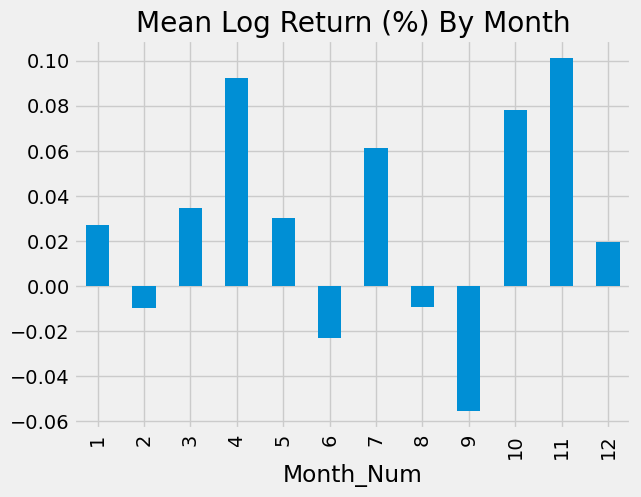

In [15]:
# Plot the mean log returns by month
series.plot(kind='bar', title='Mean Log Return (%) By Month')
plt.xticks(rotation=90)
plt.show()

In [16]:
# Create a function to get the seasonality 
def get_seasonality(df):
    # Create an empty list to store the seasonality
    Seasonality = []
    # Loop through the data set
    for i in range(0, len(df)):
        month = df['Month_Num'][i]
        # Check if the month is between May (5) and October (10)
        if month >= 5 and month <= 10:
            Seasonality.append('May_Oct')
        else:
            Seasonality.append('Nov_Apr')
    return Seasonality

In [17]:
# Get and Store the Seasonality to the dataset
df["Seasonality"] = get_seasonality(df)

/tmp/ipykernel_1068/2853249263.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  month = df['Month_Num'][i]


In [18]:
# Get and show the mean log returns of the seasons 
seas = df.groupby("Seasonality")['Log_Returns'].mean()*100
# Show the data
seas

Seasonality
May_Oct    0.014113
Nov_Apr    0.044488
Name: Log_Returns, dtype: float64

Text(0, 0.5, 'Mean Log Returns')

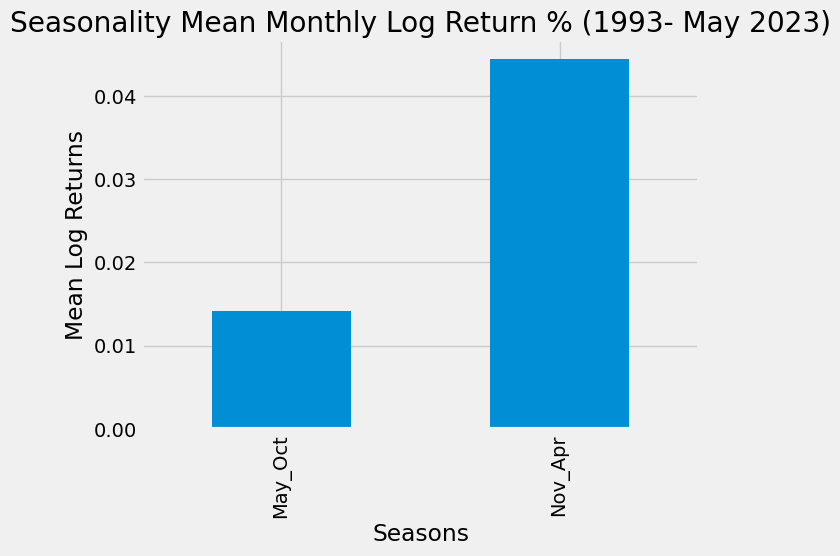

In [19]:
# Visually show the mean returns of the seasons
seas.plot(kind='bar', title='Seasonality Mean Monthly Log Return % (1993- May 2023)')
plt.xlabel('Seasons')
plt.ylabel('Mean Log Returns')